## 빅데이터 활용 AI 설계
# CycleGAN

In [2]:
! pip install git+https://www.github.com/keras-team/keras-contrib.git

  Cloning https://www.github.com/keras-team/keras-contrib.git to /tmp/pip-req-build-k5spqqrb
  Running command git clone -q https://www.github.com/keras-team/keras-contrib.git /tmp/pip-req-build-k5spqqrb
  Created wheel for keras-contrib: filename=keras_contrib-2.0.8-cp36-none-any.whl size=101065 sha256=c69fb84444223b17a5bca6bf4ee23d392533eddde28ff8b1dbc22da0b699133b
  Stored in directory: /tmp/pip-ephem-wheel-cache-l8muuvws/wheels/11/27/c8/4ed56de7b55f4f61244e2dc6ef3cdbaff2692527a2ce6502ba
Successfully built keras-contrib


In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from keras.models import Model
from keras.layers import Conv2D, Dense, Flatten, Input, Reshape,\
    Conv2DTranspose, LeakyReLU, concatenate
from keras.optimizers import RMSprop

Using TensorFlow backend.


### keras-contrib 설치
- https://github.com/keras-team/keras-contrib 참고
- pip install git+https://www.github.com/keras-team/keras-contrib.git
- keras_contrib.layers.InstanceNormalization

In [0]:
from keras_contrib.layers import InstanceNormalization

### generator for target

In [6]:
### encoder
inputs = Input((32,32,1))

e1 = InstanceNormalization()(inputs)
e1 = LeakyReLU(alpha=0.2)(e1)
e1 = Conv2D(32, (3,3), strides=1, padding='same')(e1) # (32,32,32)

e2 = InstanceNormalization()(e1)
e2 = LeakyReLU(alpha=0.2)(e2)
e2 = Conv2D(64, (3,3), strides=2, padding='same')(e2) # (16,16,64)

e3 = InstanceNormalization()(e2)
e3 = LeakyReLU(alpha=0.2)(e3)
e3 = Conv2D(128, (3,3), strides=2, padding='same')(e3) # (8,8,128)

e4 = InstanceNormalization()(e3)
e4 = LeakyReLU(alpha=0.2)(e3)
e4 = Conv2D(256, (3,3), strides=2, padding='same')(e3) # (4,4,256)

W0901 14:55:39.137946 140415417804672 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:66: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0901 14:55:39.172955 140415417804672 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:541: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0901 14:55:39.200874 140415417804672 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4432: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [7]:
e4

<tf.Tensor 'conv2d_4/BiasAdd:0' shape=(?, 4, 4, 256) dtype=float32>

In [0]:
### decoder
d1 = InstanceNormalization()(e4)
d1 = LeakyReLU(alpha=0.2)(d1)
d1 = Conv2DTranspose(128, (3,3), strides=2, padding='same')(d1)
d1 = concatenate([d1,e3]) # U-Net

d2 = InstanceNormalization()(d1)
d2 = LeakyReLU(alpha=0.2)(d2)
d2 = Conv2DTranspose(64, (3,3), strides=2, padding='same')(d2)
d2 = concatenate([d2,e2]) # U-Net

d3 = InstanceNormalization()(d2)
d3 = LeakyReLU(alpha=0.2)(d3)
d3 = Conv2DTranspose(32, (3,3), strides=2, padding='same')(d3)
d3 = concatenate([d3,e1]) # U-Net

outputs = Conv2DTranspose(3, (3,3), strides=1, padding='same', activation='sigmoid')(d3)

In [0]:
g_target = Model(inputs, outputs)

In [10]:
g_target.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 32, 32, 1)    0                                            
__________________________________________________________________________________________________
instance_normalization_1 (Insta (None, 32, 32, 1)    2           input_1[0][0]                    
__________________________________________________________________________________________________
leaky_re_lu_1 (LeakyReLU)       (None, 32, 32, 1)    0           instance_normalization_1[0][0]   
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 32, 32, 32)   320         leaky_re_lu_1[0][0]              
____________________________________________________________________________________________

### generator for source

In [0]:
### encoder
inputs = Input((32,32,3))

e1 = InstanceNormalization()(inputs)
e1 = LeakyReLU(alpha=0.2)(e1)
e1 = Conv2D(32, (3,3), strides=1, padding='same')(e1) # (32,32,32)

e2 = InstanceNormalization()(e1)
e2 = LeakyReLU(alpha=0.2)(e2)
e2 = Conv2D(64, (3,3), strides=2, padding='same')(e2) # (16,16,64)

e3 = InstanceNormalization()(e2)
e3 = LeakyReLU(alpha=0.2)(e3)
e3 = Conv2D(128, (3,3), strides=2, padding='same')(e3) # (8,8,128)

e4 = InstanceNormalization()(e3)
e4 = LeakyReLU(alpha=0.2)(e3)
e4 = Conv2D(256, (3,3), strides=2, padding='same')(e3) # (4,4,256)

In [12]:
e4

<tf.Tensor 'conv2d_8/BiasAdd:0' shape=(?, 4, 4, 256) dtype=float32>

In [0]:
### decoder
d1 = InstanceNormalization()(e4)
d1 = LeakyReLU(alpha=0.2)(d1)
d1 = Conv2DTranspose(128, (3,3), strides=2, padding='same')(d1)
d1 = concatenate([d1,e3]) # U-Net

d2 = InstanceNormalization()(d1)
d2 = LeakyReLU(alpha=0.2)(d2)
d2 = Conv2DTranspose(64, (3,3), strides=2, padding='same')(d2)
d2 = concatenate([d2,e2]) # U-Net

d3 = InstanceNormalization()(d2)
d3 = LeakyReLU(alpha=0.2)(d3)
d3 = Conv2DTranspose(32, (3,3), strides=2, padding='same')(d3)
d3 = concatenate([d3,e1]) # U-Net

outputs = Conv2DTranspose(1, (3,3), strides=1, padding='same', activation='sigmoid')(d3)

In [0]:
g_source = Model(inputs, outputs)

In [15]:
g_source.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
instance_normalization_8 (Insta (None, 32, 32, 3)    2           input_2[0][0]                    
__________________________________________________________________________________________________
leaky_re_lu_8 (LeakyReLU)       (None, 32, 32, 3)    0           instance_normalization_8[0][0]   
__________________________________________________________________________________________________
conv2d_5 (Conv2D)               (None, 32, 32, 32)   896         leaky_re_lu_8[0][0]              
____________________________________________________________________________________________

### discriminator for target

In [0]:
inputs = Input((32,32,3))

e1 = LeakyReLU(alpha=0.2)(inputs)
e1 = Conv2D(32, (3,3), strides=2, padding='same')(e1) # (16,16,32)

e2 = LeakyReLU(alpha=0.2)(e1)
e2 = Conv2D(64, (3,3), strides=2, padding='same')(e2) # (8,8,64)

e3 = LeakyReLU(alpha=0.2)(e2)
e3 = Conv2D(128, (3,3), strides=2, padding='same')(e3) # (4,4,128)

e4 = LeakyReLU(alpha=0.2)(e3)
e4 = Conv2D(256, (3,3), strides=1, padding='same')(e4) # (4,4,256)

x = LeakyReLU(alpha=0.2)(e4)
outputs = Conv2D(1, (3,3), strides=1, padding='same')(x) # (4,4,1) ==> PatchGAN

In [17]:
d_target = Model(inputs, outputs)

d_target.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
leaky_re_lu_15 (LeakyReLU)   (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 16, 16, 32)        896       
_________________________________________________________________
leaky_re_lu_16 (LeakyReLU)   (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 8, 8, 64)          18496     
_________________________________________________________________
leaky_re_lu_17 (LeakyReLU)   (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 4, 4, 128)         7385

In [18]:
d_target.compile(loss='mse', optimizer=RMSprop(lr=2e-4, decay=6e-8), metrics=['acc'])

W0901 14:56:03.578932 140415417804672 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:793: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



### discriminator for source

In [0]:
inputs = Input((32,32,1))

e1 = LeakyReLU(alpha=0.2)(inputs)
e1 = Conv2D(32, (3,3), strides=2, padding='same')(e1) # (16,16,32)

e2 = LeakyReLU(alpha=0.2)(e1)
e2 = Conv2D(64, (3,3), strides=2, padding='same')(e2) # (8,8,64)

e3 = LeakyReLU(alpha=0.2)(e2)
e3 = Conv2D(128, (3,3), strides=2, padding='same')(e3) # (4,4,128)

e4 = LeakyReLU(alpha=0.2)(e3)
e4 = Conv2D(256, (3,3), strides=1, padding='same')(e4) # (4,4,256)

x = LeakyReLU(alpha=0.2)(e4)
outputs = Conv2D(1, (3,3), strides=1, padding='same')(x) # (4,4,1) ==> PatchGAN

In [20]:
d_source = Model(inputs, outputs)

d_source.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 32, 32, 1)         0         
_________________________________________________________________
leaky_re_lu_20 (LeakyReLU)   (None, 32, 32, 1)         0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 16, 16, 32)        320       
_________________________________________________________________
leaky_re_lu_21 (LeakyReLU)   (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 8, 8, 64)          18496     
_________________________________________________________________
leaky_re_lu_22 (LeakyReLU)   (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 4, 4, 128)         7385

In [0]:
d_source.compile(loss='mse', optimizer=RMSprop(lr=2e-4, decay=6e-8), metrics=['acc'])

### CycleGAN 정의

In [0]:
d_target.trainable = False
d_source.trainable = False

- for target

In [0]:
source_input = Input((32,32,1))
fake_target = g_target(source_input) # (32,32,3)
preal_target = d_target(fake_target) # (4,4,1)
reco_source = g_source(fake_target) # (32,32,1) ==> reconstruction

- for source

In [0]:
target_input = Input((32,32,3))
fake_source = g_source(target_input) # (32,32,1)
preal_source = d_source(fake_source) # (4,4,1)
reco_target = g_target(fake_source) # (32,32,3) ==> reconstruction

- identity loss<br>
. g_source 에 source 이미지를 넣어 원본과 같은지 비교한다.<br>
. 하지만 현재 source 와 target 의 이미지가 흑백/컬러 로 틀리기 때문에 적용할 수 없다

- gan 모델

In [0]:
loss = ['mse', 'mse', 'mae', 'mae']
loss_weights = [1., 1., 10., 10.]

inputs = [source_input, target_input]
outputs = [preal_target, preal_source, reco_source, reco_target]

In [26]:
adv = Model(inputs, outputs)
adv.compile(loss=loss, loss_weights=loss_weights,
            optimizer=RMSprop(lr=2e-4, decay=6e-8), metrics=['acc'])

adv.summary()

Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            (None, 32, 32, 1)    0                                            
__________________________________________________________________________________________________
input_6 (InputLayer)            (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
model_1 (Model)                 (None, 32, 32, 3)    869039      input_5[0][0]                    
                                                                 model_2[2][0]                    
__________________________________________________________________________________________________
model_2 (Model)                 (None, 32, 32, 1)    868461      model_1[1][0]              

### Cifar-10 이미지

In [0]:
from keras.datasets import cifar10

In [28]:
(X_train, y_train), (_, _) = cifar10.load_data()

170500096/170498071 [==============================] - 9s 0us/step


In [29]:
X_train.shape, X_train.dtype, X_train.max(), X_train.min()

((50000, 32, 32, 3), dtype('uint8'), 255, 0)

In [0]:
### 10,000 장만 훈련한다
X_train = X_train[:10000]/255

In [31]:
X_train.shape, X_train.dtype, X_train.max(), X_train.min()

((10000, 32, 32, 3), dtype('float64'), 1.0, 0.0)

In [0]:
X_source = X_train.mean(axis=3)[:,:,:,np.newaxis]

In [33]:
X_source.shape

(10000, 32, 32, 1)

In [0]:
X_target = X_train

Text(0.5, 1.0, 'X_target[0]')

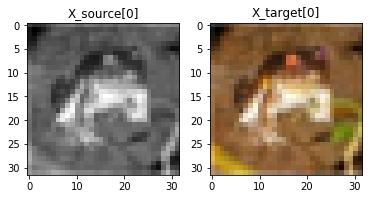

In [35]:
plt.subplot(1,2,1)
plt.imshow(X_source[0,:,:,0], cmap='gray')
plt.title('X_source[0]')
plt.subplot(1,2,2)
plt.imshow(X_target[0])
plt.title('X_target[0]')

### 훈련

In [49]:
from keras.preprocessing import image

valid = np.ones((32,4,4,1)) # (배치수,패치수,패치수,1)
fake = np.zeros((32,4,4,1))
y = np.concatenate((valid, fake)) # 앞부분은 valid(1), 뒷부분은 fake(0)

for step in range(10000):
    indices = np.random.randint(0,10000,size=32) # samples: 10000, batch_size=32
    real_target = X_target[indices]
    
    indices = np.random.randint(0,10000,size=32) # samples: 10000, batch_size=32
    real_source = X_source[indices]
    
    ### d_target
    fake_target = g_target.predict(real_source)
    X = np.concatenate((real_target, fake_target))
    metrics = d_target.train_on_batch(X, y)
    print(step, '> d_target loss:', metrics[0], end=', ')
    
    ### d_source
    fake_source = g_source.predict(real_target)
    X = np.concatenate((real_source, fake_source))
    metrics = d_source.train_on_batch(X, y)
    print('d_source loss:', metrics[0], end=', ')
    
    ### adv
    X = [real_source, real_target]
    y_adv = [valid, valid, real_source, real_target]
    metrics = adv.train_on_batch(X, y_adv)
    print('adv loss:', metrics[0])
    
    ### image save
    img_target = g_target.predict(X_source[[0]])[0]
    img_source = g_source.predict(X_target[[0]])[0]
    
    if (step+1)%500 == 0:
      img1 = image.array_to_img(img_target*255., scale=False)
      img1.save('target_%05d.png' % (step+1))
      img2 = image.array_to_img(img_source*255., scale=False)
      img2.save('source_%05d.png' % (step+1))
    
g_source.save("cyclegan-g_source.h5")
g_target.save("cyclegan-g_target.h5")

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:493: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


0 > d_target loss: 0.20800748, d_source loss: 0.22849393, adv loss: 2.5073667
1 > d_target loss: 0.24971241, d_source loss: 0.23002467, adv loss: 2.464036
2 > d_target loss: 0.23995927, d_source loss: 0.23058495, adv loss: 2.4366837
3 > d_target loss: 0.22374846, d_source loss: 0.23759761, adv loss: 2.2309077
4 > d_target loss: 0.22605087, d_source loss: 0.25210917, adv loss: 2.656766
5 > d_target loss: 0.20502205, d_source loss: 0.29930276, adv loss: 2.612838
6 > d_target loss: 0.19381759, d_source loss: 0.24635611, adv loss: 2.5550244
7 > d_target loss: 0.20245458, d_source loss: 0.22188593, adv loss: 2.593714
8 > d_target loss: 0.24542359, d_source loss: 0.22110114, adv loss: 2.7036479
9 > d_target loss: 0.25806704, d_source loss: 0.24798587, adv loss: 2.578044
10 > d_target loss: 0.24470028, d_source loss: 0.20369694, adv loss: 2.7808795
11 > d_target loss: 0.20085368, d_source loss: 0.21626063, adv loss: 2.4842563
12 > d_target loss: 0.21699409, d_source loss: 0.21899092, adv loss

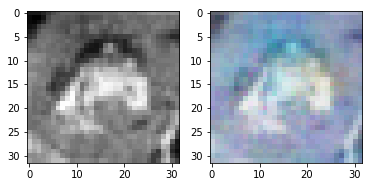

In [60]:
n = 10000

plt.subplot(1,2,1)
img = plt.imread('source_%05d.png' % n)
plt.imshow(img, cmap='gray_r')

plt.subplot(1,2,2)
img = plt.imread('target_%05d.png' % n)
plt.imshow(1-img)

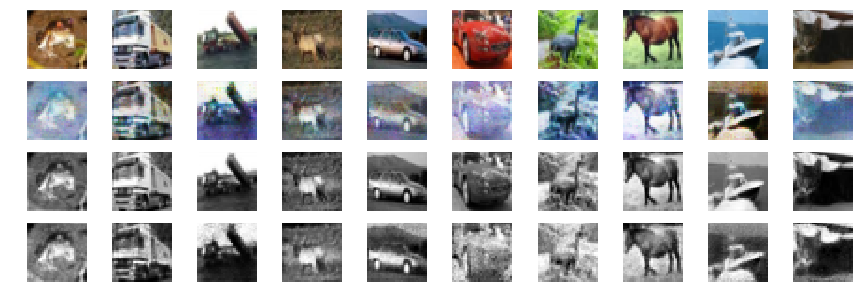

In [62]:
t = g_target.predict(X_source[:10])
s = g_source.predict(X_target[:10])

plt.figure(figsize=[15,5])
for i in range(10):
  plt.subplot(4,10,i+1)
  plt.imshow(X_train[i])
  plt.axis('off')
  
  plt.subplot(4,10,i+11)
  plt.imshow(1-t[i])
  plt.axis('off')
  
  plt.subplot(4,10,i+21)
  plt.imshow(X_source[i,:,:,0], cmap='gray')
  plt.axis('off')
  
  plt.subplot(4,10,i+31)
  plt.imshow(s[i,:,:,0], cmap='gray_r')
  plt.axis('off')